In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
plt.rc('font', family='Verdana')


In [2]:
import sys
print("версия Python: {}".format(sys.version))
import pandas as pd
print("версия Pandas: {}".format(pd.__version__))
import matplotlib
print("версия matplotlib: {}".format(matplotlib.__version__))
import numpy as np
print("версия Numpy: {}".format(np.__version__))
import scipy as sp
print("версия SciPy: {}".format(sp.__version__))
import IPython
print("версия IPython: {}".format(IPython.__version__))
import sklearn
print("версия scikit-learn: {}".format(sklearn.__version__))

версия Python: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
версия Pandas: 0.23.4
версия matplotlib: 2.2.3
версия Numpy: 1.15.1
версия SciPy: 1.1.0
версия IPython: 6.5.0
версия scikit-learn: 0.19.2


In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
print("Ключи iris_dataset: \n{}".format(iris_dataset.keys()))

Ключи iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
print(iris_dataset['DESCR'][:193] + '\n...')

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [6]:
print("Название ответов: {}".format(iris_dataset['target_names']))

Название ответов: ['setosa' 'versicolor' 'virginica']


In [7]:
print("Название признаков: \n{}".format(iris_dataset['feature_names']))

Название признаков: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print("Тип массива data: {}".format(type(iris_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [9]:
print("Форма массива data {}".format(iris_dataset['data'].shape))

Форма массива data (150, 4)


In [10]:
print("Первые пять строк массива data \n{}".format(iris_dataset['data'][:5]))

Первые пять строк массива data 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
print("Тип массива target: {}".format(type(iris_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [12]:
print("Тип массива data: {}".format(type(iris_dataset['target'])))

Тип массива data: <class 'numpy.ndarray'>


In [13]:
print("Форма массива target \n{}".format(iris_dataset['target']))

Форма массива target 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
print("Ответы \n{}".format(iris_dataset['target']))

Ответы 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
      iris_dataset['data'], iris_dataset['target'], random_state=0)

In [16]:
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))

форма массива X_train: (112, 4)
форма массива y_train: (112,)


In [17]:
print("форма массива X_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива X_test: (38, 4)
форма массива y_test: (38,)


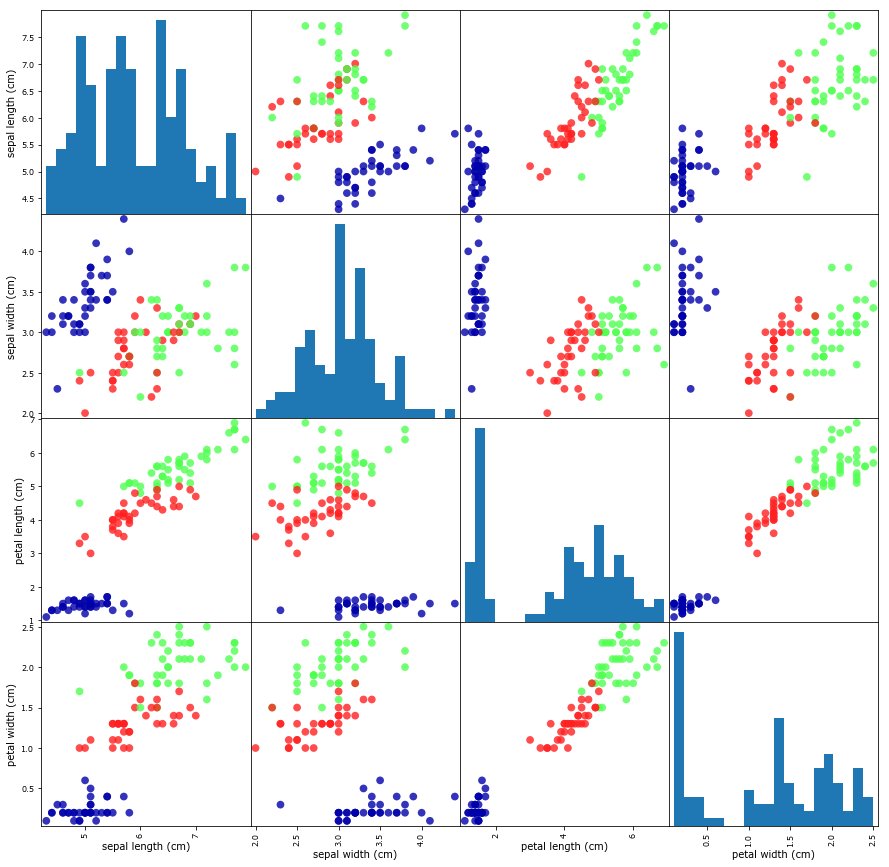

In [18]:
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# создаем матрицу рассеяния из dataframe, цвет точек задаем с помощью y_train
grr = scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

### Построение первой модели:Метод к ближайших соседей

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Получение прогнозов

In [21]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f"Форма массива X_new: {X_new.shape}")

Форма массива X_new: (1, 4)


In [22]:
prediction = knn.predict(X_new)
print(f"Прогноз {iris_dataset['target_names'][prediction]}")

Прогноз ['setosa']


### Оценка качества модели

In [23]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))

Прогнозы для тестового набора:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [24]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.97


In [25]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


# Методы машинного обучения с учителем

## Классификация и регрессия

Форма массива Х: (26, 2)


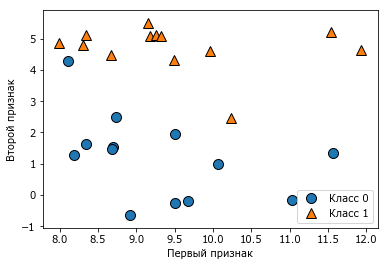

In [26]:
# генереруем набор данных
X, y = mglearn.datasets.make_forge()
# строим график для набор данных
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("Форма массива Х: {}".format(X.shape))

Text(0,0.5,'Целевая переменная')

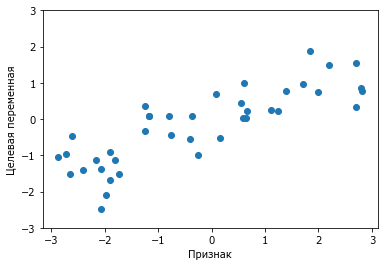

In [27]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y,'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")

In [28]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))

Ключи cancer(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [29]:
print("Форма массива data для набора cancer: {}".format(cancer.data.shape))

Форма массива data для набора cancer: (569, 30)


In [30]:
print("Количество примеров для каждого класса:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(
       cancer.target))}))

Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}


In [31]:
print("Имена признаков:\n{}".format(cancer.feature_names))

Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [32]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Форма массива data для набора boston: {}".format(boston.data.shape))

Форма массива data для набора boston: (506, 13)


In [33]:
X, y = mglearn.datasets.load_extended_boston()
print("форма массива Х: {}".format(X.shape))

форма массива Х: (506, 104)


## Метод к ближайших соседей

### Классификация с помощью k ближайщих соседей

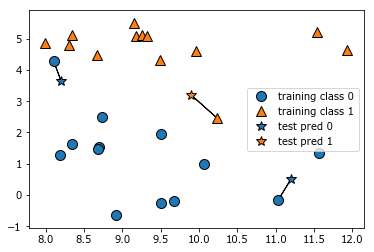

In [34]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

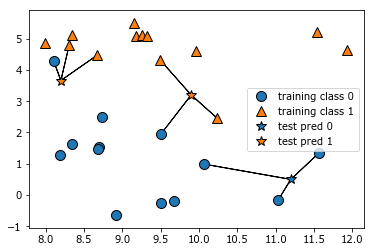

In [35]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [36]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [38]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [39]:
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]


In [40]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

Правильность на тестовом наборе: 0.86


### Анализ работы класса KNeighborsClassifier

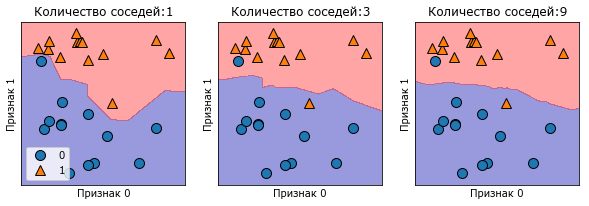

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    #создаем обьект-классификатор и подгоняем в одной строке
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("Количество соседей:{}".format(n_neighbors))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend(loc=3)

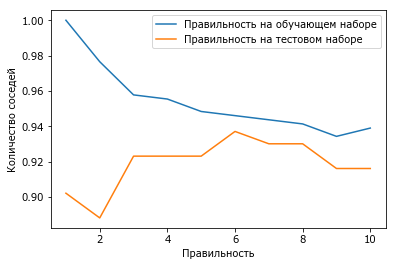

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accurcy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # строим модель
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # записываем правильность на обучающем наборе
    training_accuracy.append(clf.score(X_train, y_train))
    # зписываем правильность на тестовом наборе
    test_accurcy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy,
         label="Правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accurcy,
         label="Правильность на тестовом наборе")
plt.xlabel("Правильность")
plt.ylabel("Количество соседей")
plt.legend()

### Регрессия k ближайщих соседей

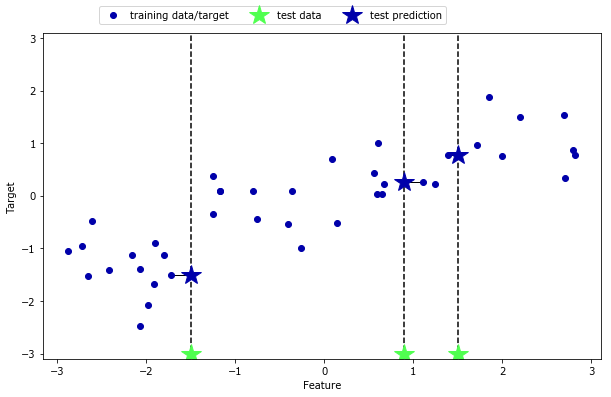

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

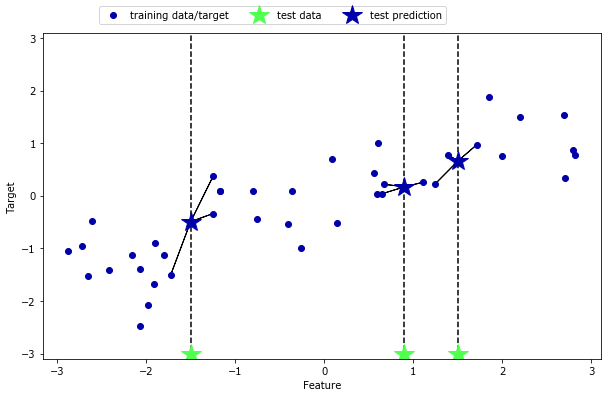

In [44]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [45]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# разбиваем набор данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# создаем экземпляр модели и устанавливаем кол-во соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгоняем модель с использованием обучающих данных и
# обучающих ответов
reg.fit(X_train, y_train)
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [46]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: 0.83


### Анализ модели KNeighborsRegressor

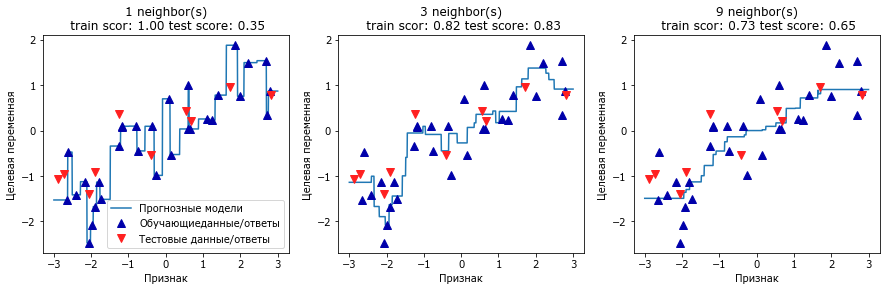

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# создаем 1000 точек даных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # получем прогнозы, используя 1б 3 и 9 соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor(s)\n train scor: {:.2f} test score: {:.2f}".format(n_neighbors,
                                        reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозные модели", "Обучающиеданные/ответы",
                "Тестовые данные/ответы"], loc="best")

## Линейные модели

### Линейные модели для регрессии

$$ \hat y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b$$

w[0]: 0.393906  b: -0.031804


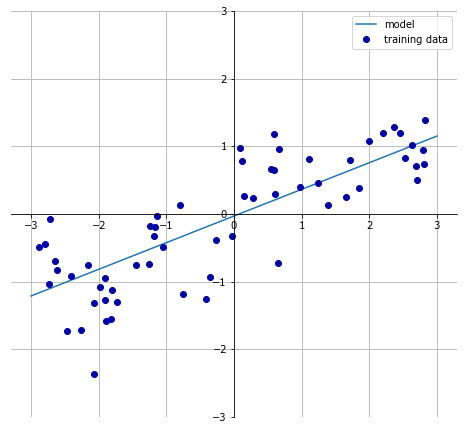

In [48]:
mglearn.plots.plot_linear_regression_wave()

### Линейная регрессия(обычный метод наименьших квадратов)

In [49]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [50]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


In [51]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.61


### Гребневая регрессия

In [52]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


In [53]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.79
Правильность на тестовом наборе: 0.64


In [54]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.93
Правильность на тестовом наборе: 0.77


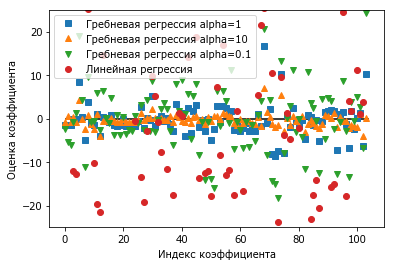

In [55]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")

plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

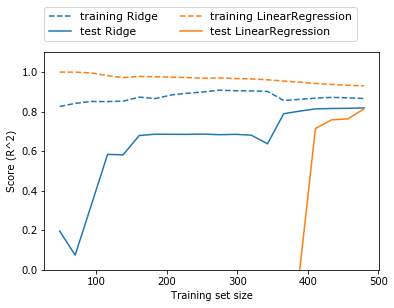

In [56]:
mglearn.plots.plot_ridge_n_samples()

### Лассо-регрессия

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.29
Правильность на тестовом наборе: 0.21
Количество использованных признаков: 4


In [58]:
# здесь мы увеличим значение "max_iter",
# иначе модель выдаст предупреждение, что нужноувеличить max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77
Количество использованных признаков: 33


In [59]:
# здесь мы увеличим значение "max_iter",
# иначе модель выдаст предупреждение, что нужноувеличить max_iter.
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.64
Количество использованных признаков: 94


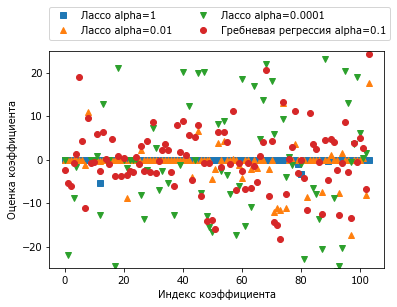

In [60]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")

plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

### Линейные модели для задач классификации

$$ \hat y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0$$

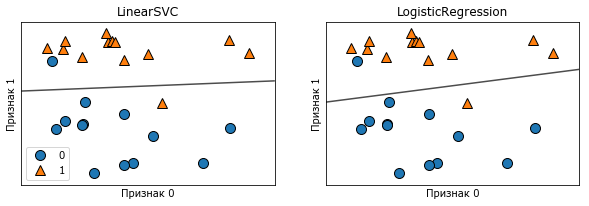

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend()

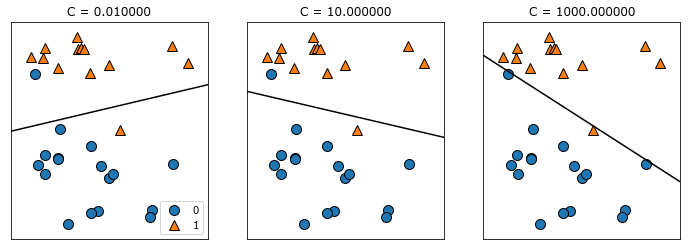

In [62]:
mglearn.plots.plot_linear_svc_regularization()

In [63]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target,
         random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.955
Правильность на тестовом наборе: 0.958


In [64]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.972
Правильность на тестовом наборе: 0.965


In [65]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.934
Правильность на тестовом наборе: 0.930


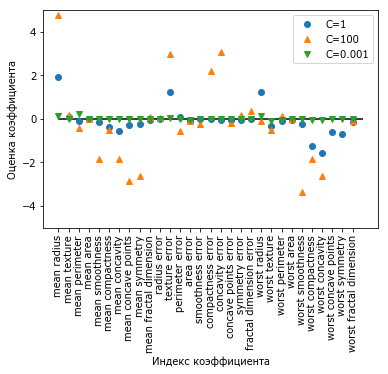

In [66]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,
           rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.ylim(-5, 5)
plt.legend()

Правильность на обучении для логрегрессии l1 c C=0.001 : 0.91
Правильность на тесте для логрегрессии l1 c C=0.001 : 0.92
Правильность на обучении для логрегрессии l1 c C=1.000 : 0.96
Правильность на тесте для логрегрессии l1 c C=1.000 : 0.96
Правильность на обучении для логрегрессии l1 c C=100.000 : 0.99
Правильность на тесте для логрегрессии l1 c C=100.000 : 0.98


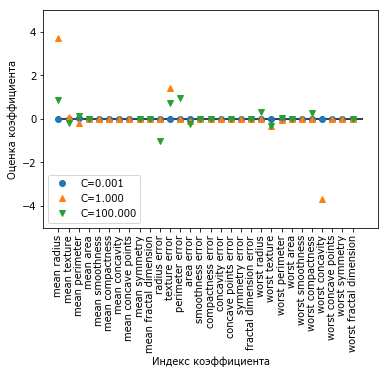

In [67]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print("Правильность на обучении для логрегрессии l1 c C={:.3f} : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Правильность на тесте для логрегрессии l1 c C={:.3f} : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,
            rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.ylim(-5, 5)
plt.legend(loc=3)

### Линейные модели для мультиклассовой классификации

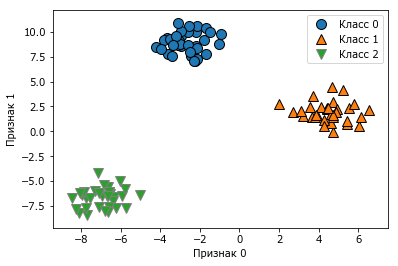

In [68]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(["Класс 0", "Класс 1", "Класс 2"])

In [69]:
linear_svm = LinearSVC().fit(X, y)
print("Форма коэффициента: ", linear_svm.coef_.shape)
print("Форма константы: ", linear_svm.intercept_.shape)

Форма коэффициента:  (3, 2)
Форма константы:  (3,)


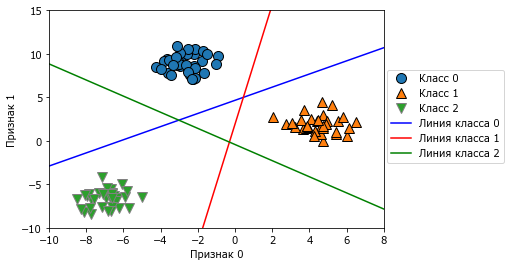

In [70]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_,
                                    linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 
            'Линия класса 1', 'Линия класса 2'], loc=(1.01, 0.3))

Text(0,0.5,'Признак 1')

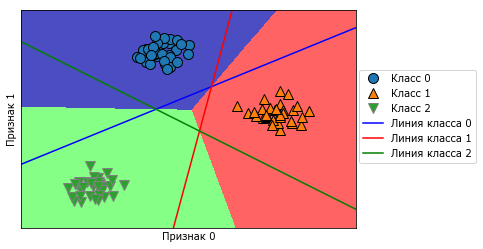

In [71]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_,
                                 linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 
            'Линия класса 1', 'Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

## Наивные байесовские классификаторы

In [72]:
X = np.array([[0, 1, 0, 1],
          [1, 0, 1, 1],
          [0, 0, 0, 1],
          [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [73]:
counts = {}
for label in np.unique(y):
    # интерпритируем по каждому классу
    # подсчитываем(суммируем) элементы 1 по признаку
    counts[label] = X[y == label].sum(axis=0)
print("Частоты признаков:\n{}".format(counts))

Частоты признаков:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## Деревья решений

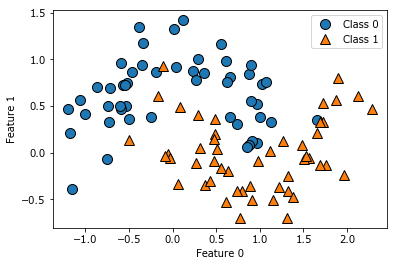

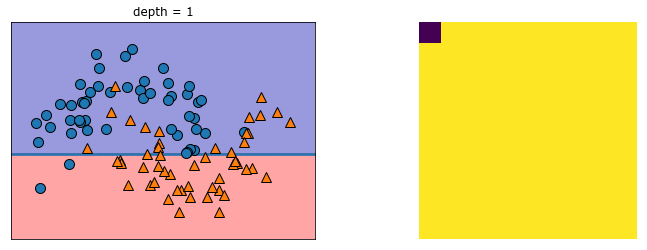

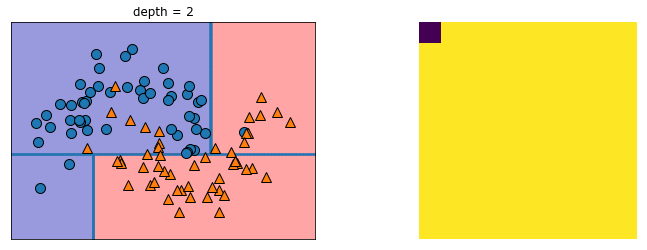

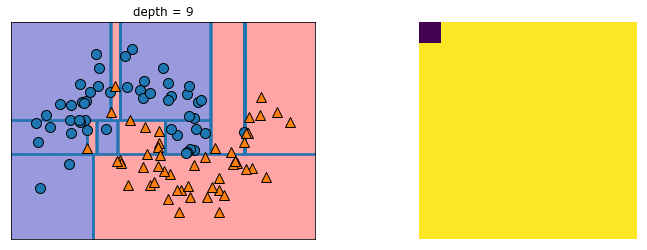

In [77]:
mglearn.plots.plot_tree_progressive()

### Контроль сложности деревьев решений

In [78]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.937


In [79]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.951


### Анализ деревьев решений

In [80]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'bening'],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [86]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'